<a href="https://colab.research.google.com/github/Olaoluwakiitan-Olabiyi/PortfolioProject/blob/main/Medical_Patient_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Network Kaggle-Project

Use the "Run" button to execute the code.

## PROBLEM STATEMENT

In today’s world of automation, the skills and knowledge of a person could be utilized at the best places possible by automating tasks wherever possible.

 As a part of the HealthIsWealth hospital automation system, you have been contracted as a professional data scientist who will build a system that would predict and estimate whether the patient should be categorized as an incare patient or an outcare patient with the help of several data points about the patients, their conditions and lab tests.


The difference between an inpatient and outpatient care is how long a patient must remain in the facility where they have the procedure done.


Inpatient care requires overnight hospitalization. Patients must stay at the medical facility where their procedure was done (which is usually a hospital) for at least one night. During this time, they remain under the supervision of a nurse or doctor.


Patients receiving outpatient care do not need to spend a night in a hospital. They are free to leave the hospital once the procedure is over. In some exceptional cases, they need to wait while anesthesia wears off or to make sure there are not any complications. As long as there are not any serious complications, patients do not have to spend the night being supervised.



In [ ]:
pip install opendatasets --upgrade --quiet


In [ ]:
import opendatasets as od

DSN_hackathon ='https://www.kaggle.com/c/data-science-nigeria-patient-treatment/data'

od.download(DSN_hackathon)



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: olaoluwakiitan
Your Kaggle Key: ··········


100%|██████████| 91.0k/91.0k [00:00<00:00, 19.7MB/s]


Extracting archive ./data-science-nigeria-patient-treatment/data-science-nigeria-patient-treatment.zip to ./data-science-nigeria-patient-treatment


###IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

### Import Datasets

In [ ]:
in_out_train =  '/content/data-science-nigeria-patient-treatment/train.csv'
in_out_test = '/content/data-science-nigeria-patient-treatment/test.csv'
sample_submission = '/content/data-science-nigeria-patient-treatment/sample_submission.csv'


In [ ]:
train=pd.read_csv(in_out_train)
test=pd.read_csv(in_out_test)
sample = pd.read_csv (sample_submission)

In [ ]:

train.head(10)



,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,patient_id_1270,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,F,0
1,patient_id_1762,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,M,0
2,patient_id_3355,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,F,0
3,patient_id_2443,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,M,0
4,patient_id_3414,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,F,1
5,patient_id_1921,36.3,12.4,4.35,5.3,258,30.2,34.6,87.2,43,F,1
6,patient_id_537,46.8,15.5,5.65,3.8,35,28.7,33.5,85.7,21,M,1
7,patient_id_1589,34.5,11.3,4.20,13.8,286,28.6,33.2,86.0,37,F,1
8,patient_id_2039,36.7,12.5,4.44,19.4,87,29.8,34.5,86.3,45,F,1
9,patient_id_3624,38.8,12.6,4.93,15.5,389,26.9,32.9,81.8,68,F,1


In [ ]:
train.tail(5)

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
3083,patient_id_4149,40.5,13.8,4.54,10.9,290,32.1,34.5,93.1,79,M,0
3084,patient_id_1890,28.8,10.5,3.49,20.6,735,32.3,37.1,87.2,43,F,1
3085,patient_id_350,45.9,15.4,5.64,3.9,281,28.5,33.9,84.2,14,M,0
3086,patient_id_79,32.6,10.2,5.36,4.4,303,20.0,31.8,62.9,3,M,1
3087,patient_id_3927,41.5,14.0,5.23,4.3,176,28.1,34.1,82.3,74,F,0


In [ ]:
test.head()

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,patient_id_4373,33.0,11.1,4.15,11.1,329,28.4,34.1,83.2,89,F
1,patient_id_2204,34.0,11.1,4.23,9.7,120,27.9,33.1,84.1,47,F
2,patient_id_93,42.4,14.1,5.71,4.3,239,25.8,33.6,76.7,3,M
3,patient_id_798,40.3,13.4,5.19,4.7,208,27.1,33.7,80.5,25,F
4,patient_id_789,33.3,11.4,4.28,7.5,206,28.3,34.7,81.3,25,F


In [ ]:

sample

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1
...,...,...
1319,patient_id_2070,1
1320,patient_id_1789,1
1321,patient_id_1725,1
1322,patient_id_3707,1


### Exploratory Data Analysis

- NB:
Whatever cleaning or preprocessing performed on the train data should also be done on the test data.

In [ ]:
train.shape


(3088, 12)

In [ ]:
test.shape

(1324, 11)

In [ ]:
sample.shape

(1324, 2)

In [ ]:
train.columns

Index(['patient_id_', 'HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE',
       'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX',
       'SOURCE'],
      dtype='object')

In [ ]:
target = [col for col in train.columns if col not in test.columns]
target

['SOURCE']

## Insights

- The Source column is the target column.
-  The Source column has two categories and it is an int datatype.
- From the barchart ,the 'SOURCE' Column is somewhat balanced- 0=59% and 1= 41%
- There are no missing values in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


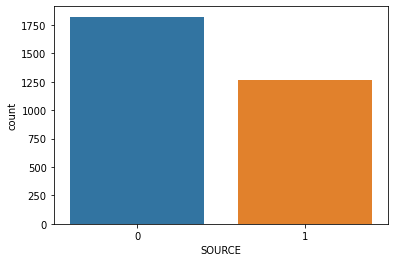

In [ ]:
sns.countplot(train['SOURCE'], label = 'counts') # visulaize the value_counts in the target variable 
# From the barchart below, the 'SOURCE' Column is somewhat balanced.

In [ ]:
train ['SOURCE'].head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: SOURCE, dtype: int64

In [ ]:
train ['SOURCE'].value_counts() #checking the number of categories present

0    1822
1    1266
Name: SOURCE, dtype: int64

In [ ]:

percent_source = (train ['SOURCE'].value_counts()) / len (train['SOURCE'])  * 100  # checking %number of categories present
percent_source

0    59.002591
1    40.997409
Name: SOURCE, dtype: float64

In [ ]:
#sns.kdeplot(train.SOURCE) ### distribution of the 'SOURCE column'

In [ ]:
train.describe() # check for the statistics

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000
mean,38.381865,12.638472,4.752160,8.788504,260.652850,28.218264,33.352364,84.540026,46.617876,0.409974
std,6.070420,2.104983,0.792281,5.055580,115.504157,2.658656,1.227691,6.814936,21.684646,0.491908
min,13.900000,4.300000,1.690000,1.200000,13.000000,14.900000,26.400000,54.000000,1.000000,0.000000
25%,34.500000,11.275000,4.240000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.800000,12.800000,4.790000,7.600000,259.000000,28.700000,33.400000,85.400000,47.000000,0.000000
75%,42.700000,14.200000,5.260000,10.400000,325.000000,29.800000,34.100000,88.700000,64.000000,1.000000
max,69.200000,18.100000,8.070000,76.700000,1188.000000,36.800000,39.000000,105.300000,99.000000,1.000000


In [ ]:
train.info() ##checking the data details present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id_   3088 non-null   object 
 1   HAEMATOCRIT   3088 non-null   float64
 2   HAEMOGLOBINS  3088 non-null   float64
 3   ERYTHROCYTE   3088 non-null   float64
 4   LEUCOCYTE     3088 non-null   float64
 5   THROMBOCYTE   3088 non-null   int64  
 6   MCH           3088 non-null   float64
 7   MCHC          3088 non-null   float64
 8   MCV           3088 non-null   float64
 9   AGE           3088 non-null   int64  
 10  SEX           3088 non-null   object 
 11  SOURCE        3088 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 289.6+ KB


- There are two categorical columns(patient_id, and SEX). We can drop the id since it is not relevant to the model building.

We will then encode the SEX column

## Splitting the dataframe into numerical and categorical columns

In [ ]:
cat_feat= [feat for feat in train.columns if train[feat].dtype =='O']
cat_feat

['patient_id_', 'SEX']

In [ ]:
#test_cat_feat= [feat for feat in test.columns if test[feat].dtype =='O']
#test_cat_feat

In [ ]:
num_feat= [feat for feat in train.columns if feat not in cat_feat ]
num_feat

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE',
 'SOURCE']

In [ ]:
train[num_feat]

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,0
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,0
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,0
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,0
4,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,1
...,...,...,...,...,...,...,...,...,...,...
3083,40.5,13.8,4.54,10.9,290,32.1,34.5,93.1,79,0
3084,28.8,10.5,3.49,20.6,735,32.3,37.1,87.2,43,1
3085,45.9,15.4,5.64,3.9,281,28.5,33.9,84.2,14,0
3086,32.6,10.2,5.36,4.4,303,20.0,31.8,62.9,3,1


In [ ]:
#remove the target feature and the patient_id from the numerical features
rem= ['SOURCE']
for i in rem:
   num_feat.remove(i)
num_feat

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE']

In [ ]:
#test_num_feat= [feat for feat in test.columns if feat not in cat_feat ]
#test_num_feat

In [ ]:
train['SEX'].value_counts() # to check the number of categories present in the 'SEX' column

M    1617
F    1471
Name: SEX, dtype: int64

In [ ]:
test['SEX'].value_counts() # to check the number of categories present in the 'SEX' column

M    673
F    651
Name: SEX, dtype: int64

In [ ]:
train.drop('patient_id_' , axis=1, inplace=True)
train.head()
# drop patient_id and check the train.head to confirm the drop

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,F,0
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,M,0
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,F,0
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,M,0
4,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,F,1


- Since the 'SEX' has just two categories, we can use the one-hot encoder or label encoder(on the train and test data)

In [ ]:
train.isna().sum() ##to check for missing values

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [ ]:
test.isna().sum()

patient_id_     0
HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
dtype: int64

### Checking for the correlation between the features with reference to the target variable.

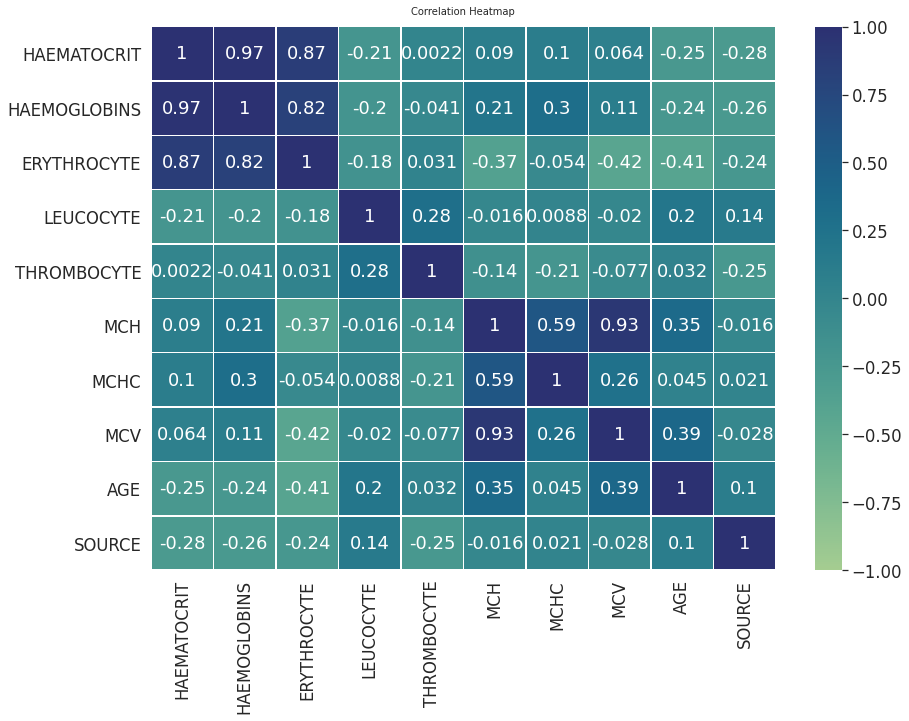

In [ ]:
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, linewidth= 0.5, cmap= 'crest') ### checking the correlation between the features
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);
plt.show()

### QUESTIONS

1. Does the age of the patient have an influence on whether the patient will be an incare or outcare?

2. Is there a relationship between the LEAUCOCYTE and the SOURCE column?

3. Can we make any inference from the sex column? 

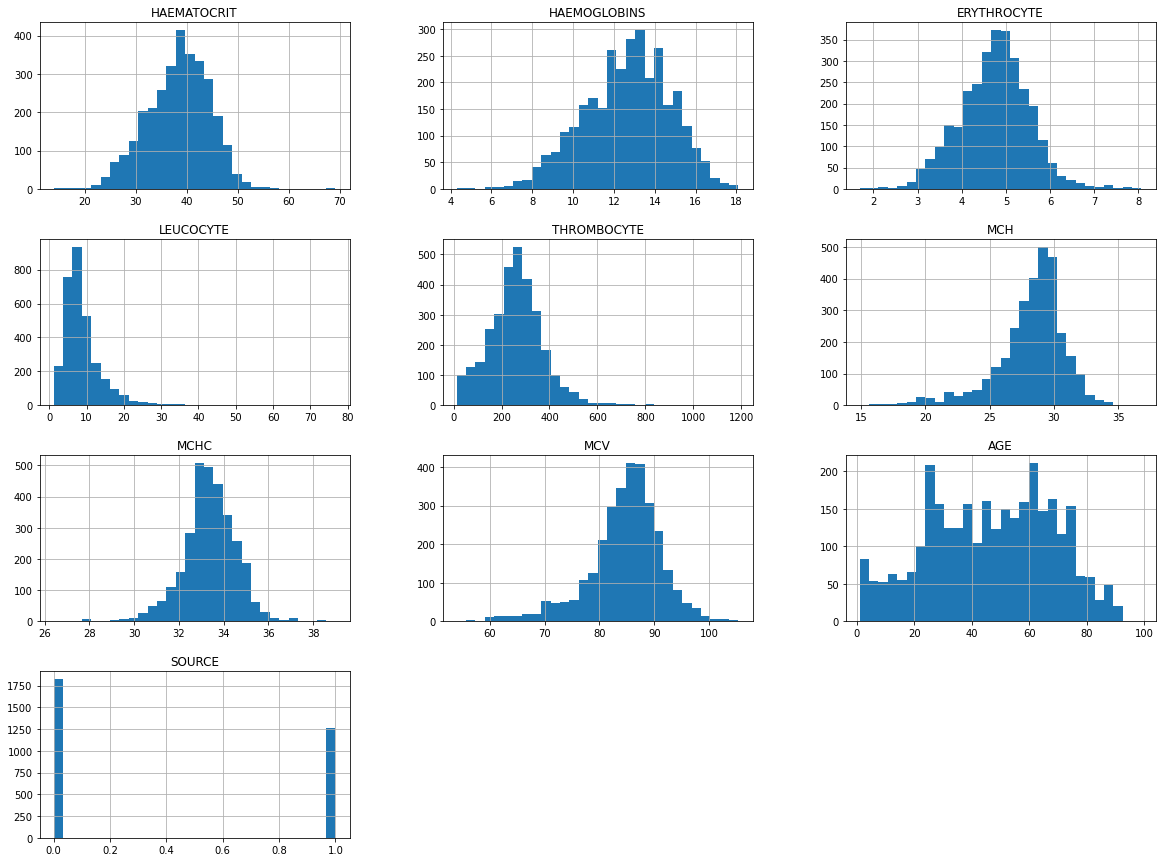

In [ ]:
train.hist(bins=30, figsize=(20, 15))
plt.show()

In [ ]:
train.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [ ]:
train.SOURCE.value_counts() 

0    1822
1    1266
Name: SOURCE, dtype: int64

- There are 1822 inpatients(0) and 1266 outpatients(1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


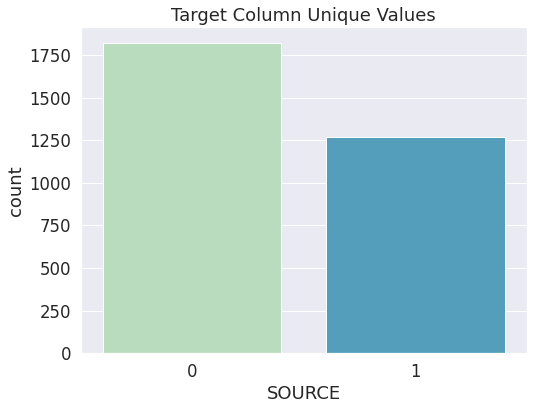

In [ ]:
plt.figure (figsize= (8, 6))
sns.set_style('whitegrid')
sns.set(font_scale= 1.5)
sns.countplot(train['SOURCE'], label = 'counts', palette= 'GnBu')
plt.title ('Target Column Unique Values')
plt.show()

 # visulaize the value_counts in the target variable 
# From the barchart below, the 'SOURCE' Column is somewhat balanced.

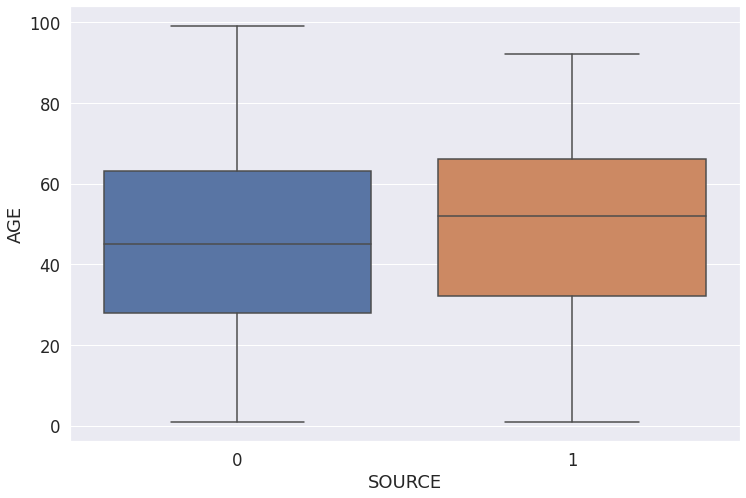

In [ ]:
sns.set (font_scale = 1.5)
sns.boxplot (x= 'SOURCE', y= 'AGE', data =train);
plt.gcf().set_size_inches (12, 8)


**bold text**
- The oldest patient is within the age of 100 and the youngest patient is probably a todler.

- Most of the inpatients (blue box plot) fall somewhere around 25-65 years, with the median age of 47.
```
- The outpatients have a similar distribution , though with the oldest falling around the 90 year mark```



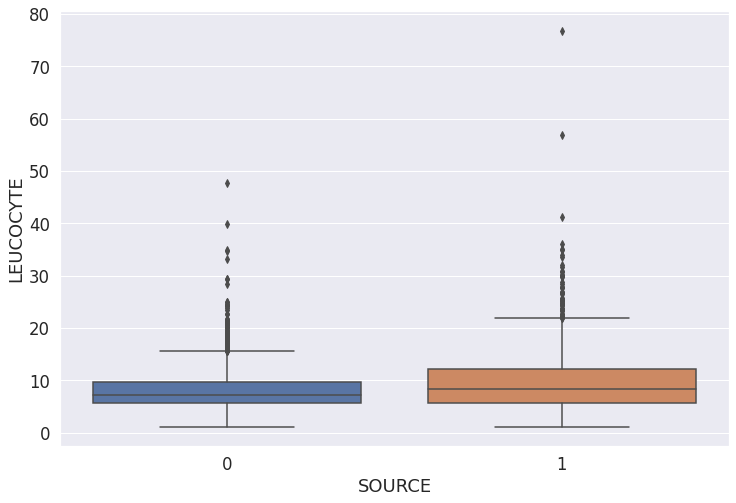

In [ ]:
sns.set (font_scale = 1.5)
sns.boxplot (x= 'SOURCE', y= 'LEUCOCYTE', data =train);
plt.gcf().set_size_inches (12, 8)


- There are some outliers in the Leucocyte column.

# Since the leucocyte is main purpose is to defend the body against infection and disease by ingesting foreign materials and cellular debris, then it correlates with the box plot above which shows the inpatients have less leucocytes compared to the outpatients.

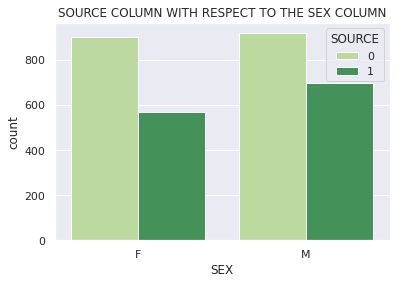

<Figure size 864x1008 with 0 Axes>

In [ ]:
plt.title ('SOURCE COLUMN WITH RESPECT TO THE SEX COLUMN')
sns.countplot (x= 'SEX', hue= 'SOURCE', data =train, palette= 'YlGn');

plt.figure (figsize= (12, 14))
sns.set(font_scale= 1.0)
plt.show()


- The number of female and male inpatients are very close.
- There are more male outpatients than female outpatients.

## Question

-- Since there are more male outpatients than females, could it be that the % of females with fewer leucocytes are more??? 



##PREPROCESSING

## Encoding the categorical variable.

In [ ]:
from sklearn import preprocessing

le_SEX = preprocessing.LabelEncoder()

train.SEX= le_SEX.fit_transform(train.SEX)


In [ ]:
test.SEX = le_SEX.transform(test.SEX)

In [ ]:
num_feat.append ('SEX')

In [ ]:
cat_feat.remove ('SEX')

### Feature Scaling

- It is necessary to do feature scaling to bring all features in the same standing so that one significant number doesn’t impact the model just because of their large magnitude.

- In the train data for instance, the maximum in ERYTHROCYTE is 8.07 and the maximum in THROMBOCYTE is 1188, so it will be safe to create scaled values of our features.

In [ ]:
###instantitiate standard scaler.

scaler = StandardScaler()
cols = num_feat

x = scaler.fit_transform(train[num_feat])
testing = scaler.fit_transform(test[num_feat])


testing should be 

Suggestions:

df-train
final- test file
df= train and test
fit transform on train, transform on test
build model
accuracy

for final accuracy , use encodings and scalers


all transformation on train csv must be done on the test csv

In [ ]:
# create a dataframe out of the scaled data so we can still have values we can relate with instead of the array values.

x= pd.DataFrame(data = x, columns= cols)
testing=pd.DataFrame(data = testing, columns= cols)

x.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SEX
0,0.859740,0.884487,0.969308,-1.145159,-0.204812,-0.270204,0.201741,-0.416803,-0.674221,-1.048452,-1.048452
1,0.975071,0.836973,0.426484,-0.294476,-0.048949,0.557415,-0.368527,0.860011,-0.305237,0.953787,0.953787
2,-0.359484,-0.065793,-0.229956,-0.195559,0.020324,0.256463,1.342278,-0.284719,0.847840,-1.048452,-1.048452
3,1.271639,0.979515,0.792575,-0.057076,0.513893,0.143605,-0.938796,0.625195,0.248240,0.953787,0.953787
4,-1.084428,-0.826018,-0.886395,3.583056,-0.352017,0.143605,1.179345,-0.328747,0.893963,-1.048452,-1.048452


In [ ]:
y= train.SOURCE

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state = 42)

In [ ]:
x_train

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SEX
438,1.535255,1.834768,1.348023,-0.254909,0.713052,0.519796,1.260811,0.023478,-1.043205,0.953787,0.953787
2149,0.579648,0.646917,0.312869,-0.136209,-0.178835,0.444558,0.364675,0.375703,-0.259114,0.953787,0.953787
969,-0.079392,-0.018279,-0.065846,-0.076859,-0.559835,0.030748,0.283208,-0.079254,-2.011789,-1.048452,-1.048452
2501,-2.270699,-2.536523,-1.871054,-0.274692,-0.074926,-1.511634,-2.486667,-0.710324,-0.443606,-1.048452,-1.048452
1945,1.189259,1.217085,0.325493,-0.492309,0.020324,1.385035,0.283208,1.476405,0.571101,0.953787,0.953787
...,...,...,...,...,...,...,...,...,...,...,...
1638,0.530220,0.314319,0.615841,-0.175776,-0.213471,-0.608776,-0.775862,-0.328747,-0.351360,-1.048452,-1.048452
1095,-0.194724,-0.065793,-0.495056,0.259458,1.726167,0.820749,0.609076,0.683899,0.663347,-1.048452,-1.048452
1130,-2.682599,-2.061382,-2.716851,0.022058,-1.936632,2.588846,4.112154,1.036124,0.847840,-1.048452,-1.048452
1294,0.200700,0.266805,0.035145,-0.254909,0.496575,0.331701,0.364675,0.243618,-1.089328,-1.048452,-1.048452


###UPSAMPLING

- I tried to upsample the target column so as to improve my F1- score, but it gave me a lower value instead. 

- Why??

In [ ]:
#x_upsampled = x_train.copy()  #create a copy so as not to disrupt the x_train

#x_upsampled['SOURCE'] = y_train   #joining the copied y_train to the x_upsampled 

#x_zero = x_upsampled[x_upsampled.SOURCE == 0] #sorting out the categories, i.e 1 and 0
#x_1= x_upsampled[x_upsampled.SOURCE == 1]

In [ ]:
#from sklearn.utils import resample #upsample the small category , i.e x_promo_upsampled

#x_zero_upsampled = resample(x_1,n_samples = x_zero.shape[0], random_state=42)

In [ ]:

#x_upsampled_new = pd.concat([x_zero,x_zero_upsampled])


In [ ]:
#x_upsampled_new

In [ ]:
#y_train = x_upsampled_new.SOURCE
#x_train = x_upsampled_new.drop(['SOURCE'],axis=1)

In [ ]:
#sns.countplot(x_upsampled_new.SOURCE, label = 'counts') # visulaize the value_counts in the dependent variable , i.e Promoted_or_Not column.

# From the barchart below, it is obvious that the Promoted_or_Not column is not balanced.

### BUILDING A BASE MODEL

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_pred = lr.predict(x_test)

## Model Evaluation

- Using the confusion matrix for evaluation.

In [ ]:
def ConfusionMatrix (ytest,ypred, label = ['Negative', 'Positive']):

  " This function creates a confusion matrix to check the model performance"
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm= confusion_matrix(ytest, ypred)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot= True, cbar = False , fmt= 'd', cmap= 'YlGn')
  plt.xlabel('Predicted', fontsize= 12)
  plt.xticks([0.5, 1.0], label)
  plt.yticks([0.5, 1.0], label)
  plt.ylabel('Actual', fontsize= 12)
  plt.title('Confusion Matrix');
  

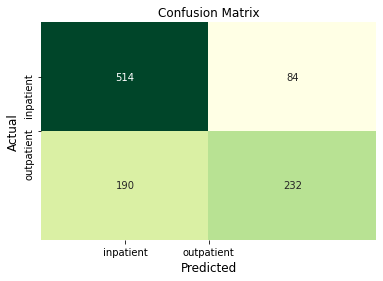

In [ ]:
ConfusionMatrix(y_test, lr_pred, label= ['inpatient', 'outpatient'])

## Interpretation

- There are 514 True Positives (TP): predicting the patient is an inpatient, and truly is.

- 232 True Negatives(TN) : predicting that the patient is an outpatient , and truly is.

- 190 False Positives(FP): predicting the patient is an inpatient, and is incorrect.

- 84 False Negatives (FN): predicting the patient is an outpatient, and is incorrect.

# NB

- y_test = The orignal labels that came with dataset values.
- y_pred = The preducted values.

### Evaluation Metrics

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
f1_score(y_test, lr_pred, average= 'micro')

0.7313725490196079

In [ ]:
accuracy_score(y_test, lr_pred)

0.7313725490196078

In [ ]:
sample

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1
...,...,...
1319,patient_id_2070,1
1320,patient_id_1789,1
1321,patient_id_1725,1
1322,patient_id_3707,1


In [ ]:

submission_file= sample.copy()

In [ ]:
submission_file.SOURCE = lr.predict(testing)

In [ ]:
submission_file


,patient_id_,SOURCE
0,patient_id_4373,0
1,patient_id_2204,1
2,patient_id_93,0
3,patient_id_798,0
4,patient_id_789,1
...,...,...
1319,patient_id_2070,0
1320,patient_id_1789,1
1321,patient_id_1725,0
1322,patient_id_3707,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


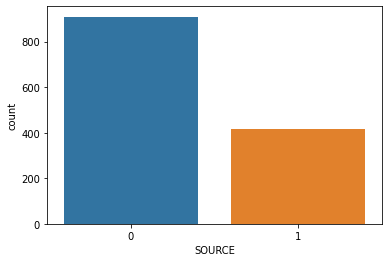

In [ ]:
sns.countplot(submission_file.SOURCE)

In [ ]:
submission_file.to_csv('my_second_submission.csv', index= False)

### Using Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier (criterion = 'entropy', random_state= 42)
dc.fit (x_train, y_train)

   

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
dc_pred = dc.predict(x_test)

## Model Evaluation

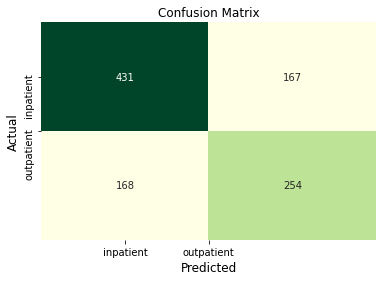

In [ ]:
ConfusionMatrix(y_test, dc_pred, label= ['inpatient', 'outpatient'])

## Interpretation

- There are 431 True Positives (TP): predicting the patient is an inpatient, and truly is.

- 254 True True Negatives(TN) : predicting that the patient is an outpatient , and truly is.

- 168 False Positives(FP): predicting the patient is an inpatient, and is incorrect.

- 167 False Negatives (FN): predicting the patient is an outpatient, and is incorrect.

### Evaluation Metrics

In [ ]:
f1_score(y_test, dc_pred, average= 'micro')

0.6647058823529411

In [ ]:
accuracy_score(y_test, dc_pred)

0.6715686274509803

## Using Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
naivemodel= GaussianNB()
naivemodel.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
naivemodel_prediction = naivemodel.predict(x_test)

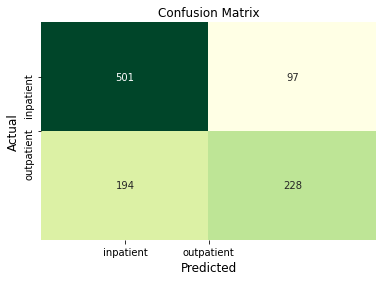

In [ ]:
ConfusionMatrix(y_test, naivemodel_prediction, label= ['inpatient', 'outpatient'])

## Interpretation

- There are 501 True Positives (TP): predicting the patient is an inpatient, and truly is.

- 228 True Negatives(TN) : predicting that the patient is an outpatient , and truly is.

- 194 False Positives(FP): predicting the patient is an inpatient, and is incorrect.

- 97 False Negatives (FN): predicting the patient is an outpatient, and is incorrect.

## Evaluation Metrics

In [ ]:
f1_score(y_test, naivemodel_prediction, average= 'micro')

0.7127450980392156

In [ ]:
accuracy_score(y_test, naivemodel_prediction)

0.7147058823529412

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf =RandomForestClassifier()

rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_predict = rf.predict(x_test)


## Model Evaluation

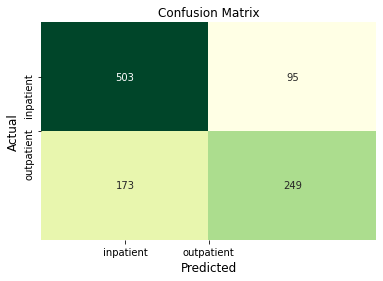

In [ ]:
ConfusionMatrix(y_test, rf_predict, label= ['inpatient', 'outpatient'])

## Interpretation

- There are 503 True Positives (TP): predicting the patient is an inpatient, and truly is.

- 249 True Negatives(TN) : predicting that the patient is an outpatient , and truly is.

- 173 False Positives(FP): predicting the patient is an inpatient, and is incorrect.

- 95 False Negatives (FN): predicting the patient is an outpatient, and is incorrect.

## Evaluation Metrics

In [ ]:
f1_score(y_test,rf_predict, average= 'micro')

0.7372549019607844

In [ ]:
accuracy_score(y_test,rf_predict )

0.7372549019607844

### XGBoost

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier(use_label_encoder =False)
xgboost_model = xgboost_model.fit(x_train, y_train)

## psssssttt....

- XGBC ran well the first few times, but while re-runing before submitting my Jupyter notebook, then it showed this error.

In [ ]:
xgb_predict= xgboost_model.predict(x_test)

In [ ]:
f1_score(y_test,xgb_predict, average= 'micro')

0.7441176470588236

In [ ]:
sample.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [ ]:
submission_file = sample.copy()
submission_file

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1
...,...,...
1319,patient_id_2070,1
1320,patient_id_1789,1
1321,patient_id_1725,1
1322,patient_id_3707,1


### SVM

In [ ]:
from sklearn.svm import SVC 
svm_model= SVC()

svm_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_predict = svm_model.predict(x_test)

## Model Evaluation

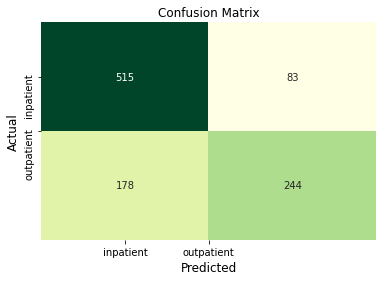

In [ ]:
ConfusionMatrix(y_test, svm_predict, label= ['inpatient', 'outpatient'])

## Interpretation

- There are 515 True Positives (TP): predicting the patient is an inpatient, and truly is.

- 244 True Negatives(TN) : predicting that the patient is an outpatient , and truly is.

- 178 False Positives(FP): predicting the patient is an inpatient, and is incorrect.

- 83 False Negatives (FN): predicting the patient is an outpatient, and is incorrect.

## Evaluation Metrics

In [ ]:
f1_score(y_test,svm_predict, average= 'micro')

0.7441176470588236

In [ ]:
accuracy_score(y_test,svm_predict )

0.7441176470588236

In [ ]:
submission_file3 = sample.copy()
submission_file3

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1
...,...,...
1319,patient_id_2070,1
1320,patient_id_1789,1
1321,patient_id_1725,1
1322,patient_id_3707,1


In [ ]:
submission_file3.SOURCE = svm_model.predict(testing)

In [ ]:
#submission_file.to_csv('my_third_submission.csv', index= False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
 samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
>>> from sklearn.neighbors import NearestNeighbors
>>> neigh = NearestNeighbors(n_neighbors=1)
>>> neigh.fit(samples)
NearestNeighbors(n_neighbors=1)
>>> print(neigh.kneighbors([[1., 1., 1.]]))
(array([[0.5]]), array([[2]]))

### MODEL SUMMARY

In [ ]:
# initialise data of lists.
data = {'Models':['Logistic Regression', 'Decision Tree' ,'Naive Bayes','Random Forest', 'XGBoost', 'SVM'],
        'F1_Score':[0.7314,0.6647, 0.7127,0.7373,  0.7441, 0.7441]}
 
# Create DataFrame
Model_Sum = pd.DataFrame(data, index= [1,2,3,4,5,6 ])
Model_Sum

,Models,F1_Score
1,Logistic Regression,0.7314
2,Decision Tree,0.6647
3,Naive Bayes,0.7127
4,Random Forest,0.7373
5,XGBoost,0.7441
6,SVM,0.7441


## CONCLUSION

Having trained all 6 models,XGBoost and the SVM models produced the best prediction; i.e whether a patient should be categorized as an inpatient or an outpatient.

Hence, with further feature slection and engineering, it is possible to get a higher F1_score with XGBoost and SVM.